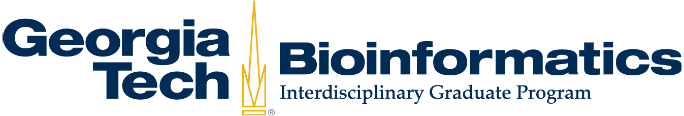

<div class="alert alert-block alert-info">
    <h1>BIOS 4150/BIOL 6150</h1>
    <h3>Instructor: Dr. King Jordan</h3>
    <p>TAs: Shivam Sharma (shivamsharma13@gatech.edu) & Vishva Natarajan (vishvanata@gatech.edu)</p>
</div>

<div class="alert alert-block alert-warning">
    <h2>Project 2 (Read Mapping) starter notebook</h2>
    <h3>Deadline: 11:59PM, October 31st, 2023</h3>
</div>

---

# **1. Getting ready for read alignment**
### *Total Questions: 5*
### *Total Points: 5+20+20+20+5 = 70*


---

<div class="alert alert-block alert-warning">
    <h3>1.1 Do you have the post-QCed fastq file from the assigned 1000 Genomes individual</h3>
    <p>We will start from where we left off in Project #1. We want to make sure that we are using the correct QCed fastq files.</p>
</div>

In [1]:
##Run "ls -lh" here to show the two fastq files.
!ls -lh ~/biol6150/ProjectSubmissions/Group19/Project1/Trimming

total 4.2G
-rw-r--r-- 1 jsmith975 gtperson 2.1G Oct 17 22:03 SRR766014_1.Trimmed.fastq.gz
-rw-r--r-- 1 jsmith975 gtperson 2.1G Oct 17 22:03 SRR766014_2.Trimmed.fastq.gz


<div class="alert alert-block alert-warning">
    <h3>1.2 Download the correct reference genome for alignment step</h3>
    <p>Please locate and donwload the human reference genome fasta file in build GRCh38</p>
</div>

In [6]:
#Where does this file come from? Give the website link (FTP?) or explain how you downloaed this file.
#Also run "ls -lh" here to see the size and location of your reference file.
!wget http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz

--2023-10-20 12:55:31--  http://hgdownload.soe.ucsc.edu/goldenPath/hg38/bigZips/hg38.fa.gz
Resolving hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)... 128.114.119.163
Connecting to hgdownload.soe.ucsc.edu (hgdownload.soe.ucsc.edu)|128.114.119.163|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 983659424 (938M) [application/x-gzip]
Saving to: ‘hg38.fa.gz’

hg38.fa.gz          100%[===================>] 938.09M  13.6MB/s    in 54s     

2023-10-20 12:56:25 (17.4 MB/s) - ‘hg38.fa.gz’ saved [983659424/983659424]



In [7]:
!ls -lh ~/biol6150/ProjectSubmissions/Group19/Project2

total 942M
-rw-r--r-- 1 yappaji3 gtperson 939M Jan 16  2014 hg38.fa.gz
-rwxrwxrwx 1 yappaji3 gtperson  49K Oct 20 12:55 Project2-ReadMapping.ipynb


In [10]:
!mv hg38.fa.gz ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/
!ls -lh ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/

total 942M
-rw-r--r-- 1 yappaji3 gtperson 939M Jan 16  2014 hg38.fa.gz


<div class="alert alert-block alert-warning">
    <h3>1.3 Find out about your reference genome file.</h3>
    <p>Does your reference fasta file have more information that just ACGT nucleotides? Please check if your fastq sequence have Ns or small/upper case ACGT nnucleotides.</p>
</div>

In [3]:
#Just glance over the fasta file. There is no need to run a script for this. 
#Write in one sentence if you see more than just upper case ACGT nucleotides.

<span style="color:red">Yes there are more than upper case ACGT in the file.<br>
The file contains "acgt" in lowercase and "N"s among them</span>

<div class="alert alert-block alert-warning">
    <h3>1.4 Using 1-3 lines, explain what upper case ACGT, lower case ACGT, and NNNs mean in your reference fasta file.</h3>
    <p>Hint: check readme files.</p>
</div>

In [ ]:
#No need to exceed 3 lines for this question.

<span style="color:red">Repeats from RepeatMasker and Tandem Repeats Finder (with period of 12 or less) are shown in lower case. Non-repeating sequence is shown in upper case. NNNs are gaps where any of the four nucleotides could be present.</span>

<div class="alert alert-block alert-warning">
    <h3>1.5 Select a tool for read alignment.</h3>
    <p>We have demonstrated bwa and minimap2 in the class. If you want to use some other tool, reach out to one of the TAs to get that tool installed on PACE-ICE.</p>
</div>

In [1]:
#Run your tool here to just make sure bash does not say "not found"

In [21]:
!minimap2

Usage: minimap2 [options] <target.fa>|<target.idx> [query.fa] [...]
Options:
  Indexing:
    -H           use homopolymer-compressed k-mer (preferrable for PacBio)
    -k INT       k-mer size (no larger than 28) [15]
    -w INT       minimizer window size [10]
    -I NUM       split index for every ~NUM input bases [8G]
    -d FILE      dump index to FILE []
  Mapping:
    -f FLOAT     filter out top FLOAT fraction of repetitive minimizers [0.0002]
    -g NUM       stop chain enlongation if there are no minimizers in INT-bp [5000]
    -G NUM       max intron length (effective with -xsplice; changing -r) [200k]
    -F NUM       max fragment length (effective with -xsr or in the fragment mode) [800]
    -r NUM[,NUM] chaining/alignment bandwidth and long-join bandwidth [500,20000]
    -n INT       minimal number of minimizers on a chain [3]
    -m INT       minimal chaining score (matching bases minus log gap penalty) [40]
    -X           skip self and dual mappings (for the all-vs-all m

# **2. Read alignment**
### *Total Questions: 4*
### *Total Points: 30+50+10+40 = 130*


---

<div class="alert alert-block alert-warning">
    <h3>2.1 Steps before mapping</h3>
    <p>You already have a fasta file, but sometimes alignment tools do not accept fasta files directly. Please read your aligners documentation and run all the preliminary steps require to run the mapping command from your aligner.</p>
</div>

<div class="alert alert-block alert-info">
    <p>Preliminary commands go in the cells below. Please use appropriate comments and markdown texts to explain what your command is doing.</p>
</div>

In [ ]:
#Write your commands here. Insert more cells if necessary

In [ ]:
!gunzip ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.fa.gz

<span style="color:red">Unzipping the file</span>

In [ ]:
!head ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.fa
!head ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.fa -n20000 | tail

<span style="color:red">Now we are able to read the file</span>

In [ ]:
#Run "ls -lh" to show what additional files were created in addition to your original fasta files.

In [8]:
!ls -lh ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment

total 57G
-rw-r--r-- 1 ssudhakar36 gtperson 3.1G Jan 16  2014 hg38.fa
-rw-r--r-- 1 ssudhakar36 gtperson 7.0G Oct 23 13:59 hg38.mmi
-rw-r--r-- 1 ssudhakar36 gtperson  21G Oct 23 14:45 SRR766014.Minimap.sam
-rw-r--r-- 1 ssudhakar36 gtperson  13G Oct 23 14:30 SRR766014.sam
-rw-r--r-- 1 jsmith975   gtperson 2.2G Oct 24 00:12 SRR766014.Sorted.bam
-rw-r--r-- 1 jsmith975   gtperson  13G Oct 23 22:01 SRR766014.Sorted.sam


<div class="alert alert-block alert-warning">
    <h3>2.2 Run mapping.</h3>
    <p>This should be one or two lines of code but it's important to understand what the options are doing.</p>
</div>

In [ ]:
#Write you command below.

In [1]:
!minimap2 -d ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.mmi ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.fa 

[M::mm_idx_gen::35.282*1.42] collected minimizers
[M::mm_idx_gen::49.371*1.55] sorted minimizers
[M::main::53.336*1.51] loaded/built the index for 455 target sequence(s)
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 455
[M::mm_idx_stat::53.978*1.50] distinct minimizers: 100202295 (37.96% are singletons); average occurrences: 5.732; average spacing: 5.587; total length: 3209286105
[M::main] Version: 2.26-r1175
[M::main] CMD: minimap2 -d /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.mmi /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.fa
[M::main] Real time: 65.168 sec; CPU: 82.082 sec; Peak RSS: 11.907 GB


In [4]:
#Align
!minimap2 -c -a ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/hg38.mmi ~/biol6150/ProjectSubmissions/Group19/Project1/Trimming/SRR766014_1.Trimmed.fastq.gz ~/biol6150/ProjectSubmissions/Group19/Project1/Trimming/SRR766014_2.Trimmed.fastq.gz > ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam


[M::main::4.467*1.00] loaded/built the index for 455 target sequence(s)
[M::mm_mapopt_update::5.491*1.00] mid_occ = 728
[M::mm_idx_stat] kmer size: 15; skip: 10; is_hpc: 0; #seq: 455
[M::mm_idx_stat::6.132*1.00] distinct minimizers: 100202295 (37.96% are singletons); average occurrences: 5.732; average spacing: 5.587; total length: 3209286105
[M::worker_pipeline::116.937*1.67] mapped 6764247 sequences
[M::worker_pipeline::200.223*1.81] mapped 6764338 sequences
[M::worker_pipeline::284.255*1.86] mapped 6764276 sequences
[M::worker_pipeline::367.461*1.89] mapped 6764437 sequences
[M::worker_pipeline::425.482*1.89] mapped 5394321 sequences
[M::worker_pipeline::536.827*1.86] mapped 6764247 sequences
[M::worker_pipeline::620.591*1.88] mapped 6764338 sequences
[M::worker_pipeline::704.514*1.89] mapped 6764276 sequences
[M::worker_pipeline::787.914*1.90] mapped 6764437 sequences
[M::worker_pipeline::846.028*1.90] mapped 5394321 sequences
[M::main] Version: 2.26-r1175
[M::main] CMD: minimap2 -

In [ ]:
#Add one extra cell as required and explain each argument/flag that was given to the mapping command.


<span style="color:red">-c signifies output CIGAR in PAF. -a signifies  putput in the SAM format.</span>

In [3]:
!minimap2

Usage: minimap2 [options] <target.fa>|<target.idx> [query.fa] [...]
Options:
  Indexing:
    -H           use homopolymer-compressed k-mer (preferrable for PacBio)
    -k INT       k-mer size (no larger than 28) [15]
    -w INT       minimizer window size [10]
    -I NUM       split index for every ~NUM input bases [8G]
    -d FILE      dump index to FILE []
  Mapping:
    -f FLOAT     filter out top FLOAT fraction of repetitive minimizers [0.0002]
    -g NUM       stop chain enlongation if there are no minimizers in INT-bp [5000]
    -G NUM       max intron length (effective with -xsplice; changing -r) [200k]
    -F NUM       max fragment length (effective with -xsr or in the fragment mode) [800]
    -r NUM[,NUM] chaining/alignment bandwidth and long-join bandwidth [500,20000]
    -n INT       minimal number of minimizers on a chain [3]
    -m INT       minimal chaining score (matching bases minus log gap penalty) [40]
    -X           skip self and dual mappings (for the all-vs-all m

<div class="alert alert-block alert-warning">
    <h3>2.3 Post alignment evaluation.</h3>
    <p>How many lines does your SAM file have?</p>
</div>

In [16]:
#Just one line for this one.
!wc -l ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam

95152723 /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam


<div class="alert alert-block alert-warning">
    <h3>2.4 Look at the 7th read that maps successfully in your SAM file and answer the following questions. (10+10+10+10 = 40Points)</h3>
    <p>1. What chromosome does it align to?</p>
    <p>2. What is the CIGAR string for this read? Explain the CIGAR string in detail.</p>
    <p>3. Does this read have a paired read which also aligns successfully?</p>
    <p>4. If the paired read aligns successfully, what does the CIGAR string for this read convey?</p>
</div>

In [23]:
!head -n 1000 ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam

@HD	VN:1.6	SO:unsorted	GO:query
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173
@SQ	SN:chr14_KI270722v1_random	LN:194050
@SQ	SN:chr14_GL000194v1_random	LN:191469
@SQ	SN:chr14_KI270723v1_random	LN:38115
@SQ	SN:chr14_KI270724v1_random	LN:39555
@SQ	SN:chr14_KI270725v1_random	LN:172810
@SQ	SN:chr14_KI270726v1_random	LN:43739
@SQ	SN:chr15	LN:101991189
@SQ	SN:chr15_KI270727v1_random	LN:448248
@SQ	SN:chr16	LN:90338345
@SQ	SN:chr16_KI270728v1_random	LN:1872759
@SQ	SN:chr17	LN:83257441
@SQ	SN:chr17_GL000205v2_random	LN:185591
@SQ	SN:chr17_KI270729v1_random	LN:280839
@SQ	SN:chr17_KI270730v1_random	LN:112551
@SQ	SN:chr18	LN:80373285
@SQ	SN:chr19	LN:58617616
@SQ	SN:chr1_KI270706v1_random	LN:175055
@SQ	SN:chr1_KI270707v1_random	LN:32032
@SQ	SN:chr1_KI270708v1_random	LN:127

<span style="color:red"> SRR766014.554	256	chr8	7859286	0	74M<br>
    1. Aligned to chromose 8<br>
    2. CIGAR string: 74M -> <br>
    74 indicates the length of the alignment and 'M represents a match<br>
    This indicates that 74 bases of the read align with the reference sequence<br>
    3. No paired read</span>

# **2. Post Read alignment**
### *Total Questions: 5*
### *Total Points: 10+20+25+15+30 = 100*


---

<div class="alert alert-block alert-warning">
    <h3>3.1 Samtools is a classic bioinformatics tools.</h3>
    <p>Check if you have samtools installed on your environment.</p>
</div>

In [1]:
#Just run the "samtools" command here and make sure it does not say "samtools not found".
!samtools


Program: samtools (Tools for alignments in the SAM format)
Version: 1.17 (using htslib 1.18)

Usage:   samtools <command> [options]

Commands:
  -- Indexing
     dict           create a sequence dictionary file
     faidx          index/extract FASTA
     fqidx          index/extract FASTQ
     index          index alignment

  -- Editing
     calmd          recalculate MD/NM tags and '=' bases
     fixmate        fix mate information
     reheader       replace BAM header
     targetcut      cut fosmid regions (for fosmid pool only)
     addreplacerg   adds or replaces RG tags
     markdup        mark duplicates
     ampliconclip   clip oligos from the end of reads

  -- File operations
     collate        shuffle and group alignments by name
     cat            concatenate BAMs
     consensus      produce a consensus Pileup/FASTA/FASTQ
     merge          merge sorted alignments
     mpileup        multi-way pileup
     sort           sort alignment file
     split          splits a

<div class="alert alert-block alert-warning">
    <h3>3.2 Is your SAM file sorted by coordinates?</h3>
    <p>SAM or BAM (which we will create later) can be sorted by the read name or read coordinate. Look at your SAM file and see if you can run a Samtools command to find out if your file is sorted. (Hint: Google your question)</p>
</div>

In [7]:
#Tell us if your SAM file is sorted.


<span style="color:red">I printed the reference sequence name, leftmost position of the read, and the mapping quality of the first 10 lines of the SAM file. It does not look like the SAM file is sorted in any particular order.</span> 

In [2]:
!samtools view -H ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam | head -n 10

@HD	VN:1.6	SO:unsorted	GO:query
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316
@SQ	SN:chr12	LN:133275309
@SQ	SN:chr13	LN:114364328
@SQ	SN:chr14	LN:107043718
@SQ	SN:chr14_GL000009v2_random	LN:201709
@SQ	SN:chr14_GL000225v1_random	LN:211173


<div class="alert alert-block alert-warning">
    <h3>3.3 Sort your SAM file?</h3>
    <p>Sort your SAM file by genomic coordinates,</p>
    <p>When you run this command, what is the output format of your result file?</p>
    <h4>Tweak samtools and change your sorted SAM file's output to SAM. (Hint: You should be able to read the file using simple cat or less)</h4>
</div>

In [15]:
!samtools sort -o ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam

[E::hts_open_format] Failed to open file "/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam.tmp.0000.bam" : File exists
samtools sort: failed to create "/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam.tmp.0000.bam": File exists
[E::hts_open_format] Failed to open file "/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam.tmp.0001.bam" : File exists
samtools sort: failed to create "/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam.tmp.0001.bam": File exists
[E::hts_open_format] Failed to open file "/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam.tmp.0002.bam" : File exists
samtools sort: failed to create "/home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam.tmp.0002.bam"

In [17]:
#Head your sorted SAM file here. Show the first 5 lines.
!samtools view -H ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam | head -n 5

@HD	VN:1.6	SO:coordinate
@SQ	SN:chr1	LN:248956422
@SQ	SN:chr10	LN:133797422
@SQ	SN:chr11	LN:135086622
@SQ	SN:chr11_KI270721v1_random	LN:100316


The result was given as a .sam file

In [ ]:
#Write any other commands used here as well.

<div class="alert alert-block alert-warning">
    <h3>3.4 Convert your SAM file to a BAM file.</h3>
    <p>This should be a single one line command.</p>
</div>

In [18]:
#command to covert SAM file to BAM file
!samtools view -Sb ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.sam > ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.bam
#or just -b


In [20]:
#Write the command run "ls -lh" to show the size and location of the file.
!ls -lh ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.bam

-rw-r--r-- 1 ssudhakar36 gtperson 3.5G Oct 30 15:02 /home/hice1/ssudhakar36/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Sorted.bam


<div class="alert alert-block alert-warning">
    <h3>3.5 Statistics of your SAM file.</h3>
    <p>1.How many total raw sequences does your SAM file have?</p>
    <p>2.How many total reads are mapped in your SAM file?</p>
</div>

In [2]:
#Show your commands and answers in additional cells as required.
!samtools view -c ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam


95152266


In [3]:
#You can parse the SAM file manually, or figure out a faster way to do this.
!samtools view -c -F 4 ~/biol6150/ProjectSubmissions/Group19/Project2/ReadAlignment/SRR766014.Minimap.sam

94214046
